In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 36s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

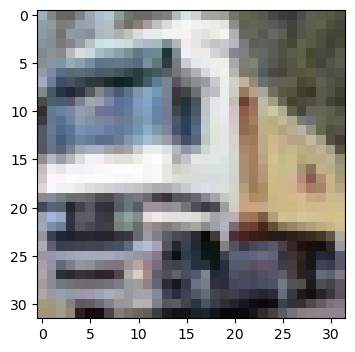

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[1])

In [8]:
#prepocessing
X_train=X_train/255
X_test=X_test/255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

In [13]:
y_test_cat[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [19]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=2)

In [22]:
model.fit(X_train,y_train_cat,epochs=15,validation_data=(X_test,y_test_cat),callbacks=[earlystopping])

Epoch 1/15


1563/1563 [==============================] - 13s 8ms/step - loss: 1.5106 - accuracy: 0.4523 - val_loss: 1.2365 - val_accuracy: 0.5654
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1831 - accuracy: 0.5828 - val_loss: 1.1630 - val_accuracy: 0.5854
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0448 - accuracy: 0.6340 - val_loss: 1.0431 - val_accuracy: 0.6392
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9357 - accuracy: 0.6733 - val_loss: 0.9685 - val_accuracy: 0.6618
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8480 - accuracy: 0.7020 - val_loss: 1.0202 - val_accuracy: 0.6433
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7734 - accuracy: 0.7292 - val_loss: 0.9528 - val_accuracy: 0.6771
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7047 - accuracy: 0.7530 - val_loss: 0.9842 - val_

In [24]:
losses=pd.DataFrame(model.history.history)

In [25]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.510564,0.45226,1.236525,0.5654
1,1.183083,0.58280,1.163048,0.5854
2,1.044796,0.63404,1.043137,0.6392
3,0.935692,0.67332,0.968450,0.6618
4,0.848015,0.70196,1.020183,0.6433
5,0.773429,0.72916,0.952824,0.6771
6,0.704690,0.75298,0.984150,0.6701
7,0.639949,0.77576,1.013254,0.6769


In [29]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[1.0132536888122559, 0.6769000291824341]


<AxesSubplot:>

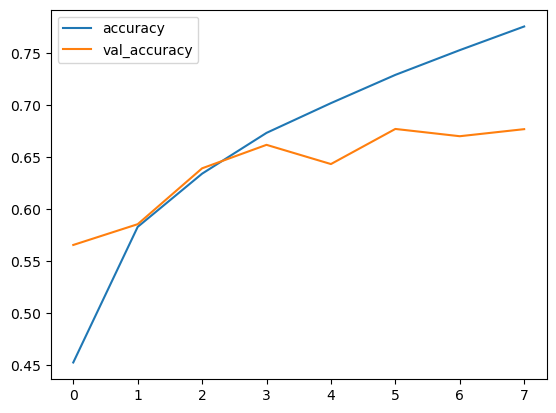

In [30]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

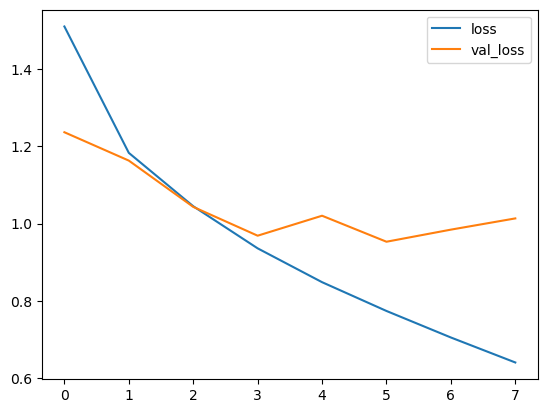

In [31]:
losses[['loss','val_loss']].plot()

In [33]:
predictions=np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 2s 5ms/step


In [34]:
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print('Classification Report :\n')
print(classification_report(y_test,predictions))

Classification Report :

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1000
           1       0.76      0.79      0.78      1000
           2       0.68      0.44      0.53      1000
           3       0.58      0.40      0.47      1000
           4       0.62      0.64      0.63      1000
           5       0.58      0.58      0.58      1000
           6       0.62      0.88      0.72      1000
           7       0.72      0.76      0.74      1000
           8       0.82      0.71      0.76      1000
           9       0.67      0.83      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



Confusion Matrix :


<AxesSubplot:>

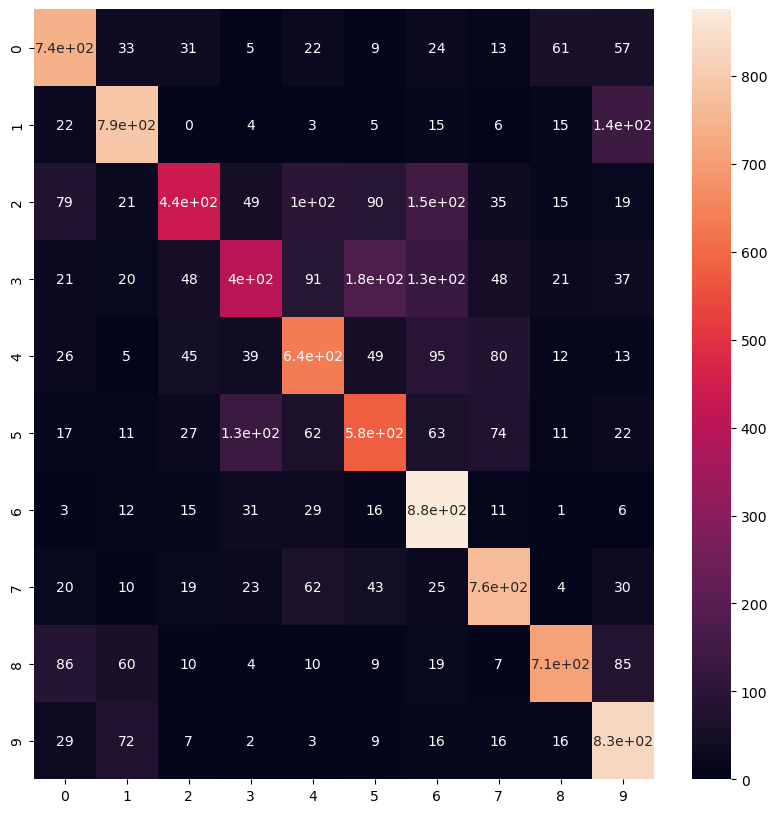

In [40]:
print('Confusion Matrix :')
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [54]:
class_labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
def class_names(class_val):
    return class_labels[class_val]

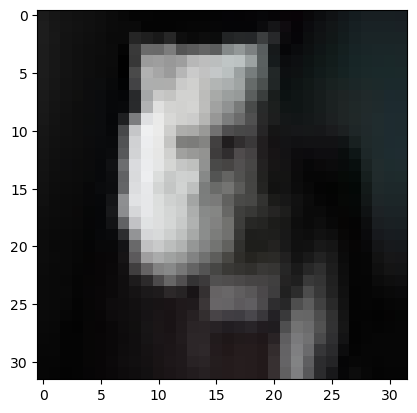

In [77]:
test=X_test[273]
plt.imshow(test)

In [78]:
test=test.reshape(1,32,32,3)
pred=np.argmax(model.predict(test), axis=-1)

1/1 [==============================] - 0s 47ms/step


In [79]:
pred

array([3], dtype=int64)

In [80]:
class_names(pred[0])

'Cat'